In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BRK-A
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


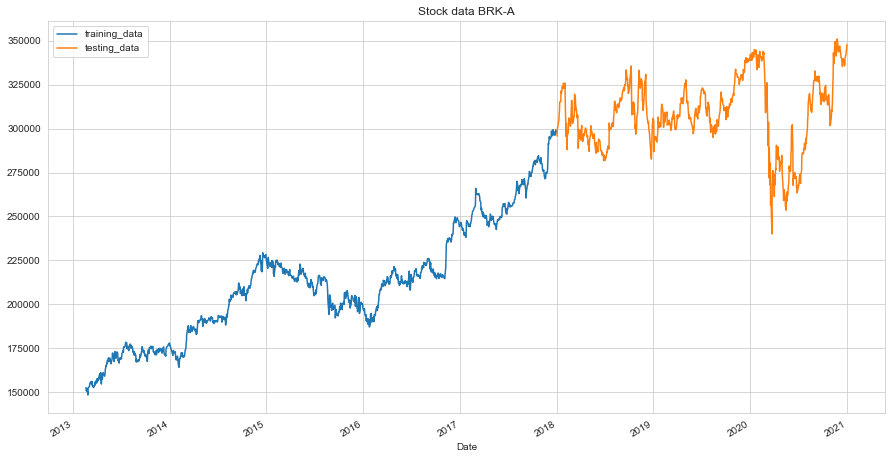

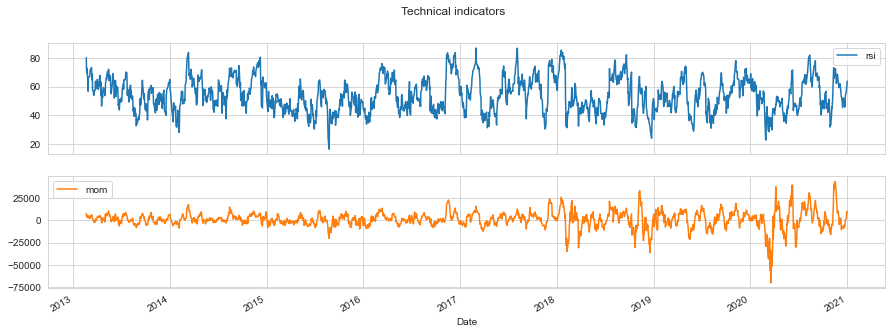

In [2]:
stock_name = 'brk-a'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1292.82, duration: 0:00:00.208056
episode: 2/2000, episode end value: 1243.78, duration: 0:00:00.209036
episode: 3/2000, episode end value: 1235.36, duration: 0:00:00.210058
episode: 4/2000, episode end value: 1246.46, duration: 0:00:00.207060
episode: 5/2000, episode end value: 1293.66, duration: 0:00:00.218050
episode: 6/2000, episode end value: 1292.05, duration: 0:00:00.222048
episode: 7/2000, episode end value: 1289.66, duration: 0:00:00.244057
episode: 8/2000, episode end value: 1290.18, duration: 0:00:00.207043
episode: 9/2000, episode end value: 1288.89, duration: 0:00:00.199045
episode: 10/2000, episode end value: 1298.30, duration: 0:00:00.207048
episode: 11/2000, episode end value: 1292.05, duration: 0:00:00.201044
episode: 12/2000, episode end value: 1295.00, duration: 0:00:00.201058
episode: 13/2000, episode end value: 1293.21, duration: 0:00:00.195045
episode: 14/2000, episode end value: 1294.44, duration: 0:00:00.210033
episode: 15/200

episode: 117/2000, episode end value: 1287.12, duration: 0:00:00.208056
episode: 118/2000, episode end value: 1292.58, duration: 0:00:00.213040
episode: 119/2000, episode end value: 1299.26, duration: 0:00:00.207030
episode: 120/2000, episode end value: 1305.08, duration: 0:00:00.207045
episode: 121/2000, episode end value: 1292.73, duration: 0:00:00.207048
episode: 122/2000, episode end value: 1294.74, duration: 0:00:00.222051
episode: 123/2000, episode end value: 1292.22, duration: 0:00:00.217047
episode: 124/2000, episode end value: 1292.65, duration: 0:00:00.207044
episode: 125/2000, episode end value: 1288.86, duration: 0:00:00.212062
episode: 126/2000, episode end value: 1290.05, duration: 0:00:00.208033
episode: 127/2000, episode end value: 1289.69, duration: 0:00:00.206048
episode: 128/2000, episode end value: 1293.94, duration: 0:00:00.204046
episode: 129/2000, episode end value: 1298.22, duration: 0:00:00.214058
episode: 130/2000, episode end value: 1295.43, duration: 0:00:00

episode: 231/2000, episode end value: 1273.66, duration: 0:00:00.205031
episode: 232/2000, episode end value: 1272.97, duration: 0:00:00.207062
episode: 233/2000, episode end value: 1274.58, duration: 0:00:00.210048
episode: 234/2000, episode end value: 1274.49, duration: 0:00:00.204043
episode: 235/2000, episode end value: 1273.07, duration: 0:00:00.200044
episode: 236/2000, episode end value: 1271.86, duration: 0:00:00.208039
episode: 237/2000, episode end value: 1273.25, duration: 0:00:00.206055
episode: 238/2000, episode end value: 1275.13, duration: 0:00:00.209062
episode: 239/2000, episode end value: 1277.34, duration: 0:00:00.213063
episode: 240/2000, episode end value: 1277.51, duration: 0:00:00.220030
episode: 241/2000, episode end value: 1277.76, duration: 0:00:00.211057
episode: 242/2000, episode end value: 1273.46, duration: 0:00:00.216051
episode: 243/2000, episode end value: 1274.62, duration: 0:00:00.207046
episode: 244/2000, episode end value: 1276.95, duration: 0:00:00

episode: 345/2000, episode end value: 1276.33, duration: 0:00:00.279061
episode: 346/2000, episode end value: 1274.06, duration: 0:00:00.278059
episode: 347/2000, episode end value: 1276.93, duration: 0:00:00.259061
episode: 348/2000, episode end value: 1274.45, duration: 0:00:00.288063
episode: 349/2000, episode end value: 1274.12, duration: 0:00:00.262055
episode: 350/2000, episode end value: 1275.27, duration: 0:00:00.273062
episode: 351/2000, episode end value: 1276.82, duration: 0:00:00.278081
episode: 352/2000, episode end value: 1277.39, duration: 0:00:00.270038
episode: 353/2000, episode end value: 1276.33, duration: 0:00:00.265061
episode: 354/2000, episode end value: 1275.35, duration: 0:00:00.268061
episode: 355/2000, episode end value: 1274.20, duration: 0:00:00.264058
episode: 356/2000, episode end value: 1274.96, duration: 0:00:00.271064
episode: 357/2000, episode end value: 1275.78, duration: 0:00:00.271060
episode: 358/2000, episode end value: 1274.90, duration: 0:00:00

episode: 459/2000, episode end value: 1274.48, duration: 0:00:00.293067
episode: 460/2000, episode end value: 1277.00, duration: 0:00:00.297071
episode: 461/2000, episode end value: 1278.82, duration: 0:00:00.294068
episode: 462/2000, episode end value: 1273.88, duration: 0:00:00.304421
episode: 463/2000, episode end value: 1275.69, duration: 0:00:00.332180
episode: 464/2000, episode end value: 1279.41, duration: 0:00:00.317071
episode: 465/2000, episode end value: 1276.50, duration: 0:00:00.346075
episode: 466/2000, episode end value: 1277.51, duration: 0:00:00.354079
episode: 467/2000, episode end value: 1275.35, duration: 0:00:00.312068
episode: 468/2000, episode end value: 1274.57, duration: 0:00:00.346082
episode: 469/2000, episode end value: 1272.99, duration: 0:00:00.399089
episode: 470/2000, episode end value: 1276.01, duration: 0:00:00.491107
episode: 471/2000, episode end value: 1276.73, duration: 0:00:00.398090
episode: 472/2000, episode end value: 1279.62, duration: 0:00:00

episode: 573/2000, episode end value: 1276.74, duration: 0:00:00.455101
episode: 574/2000, episode end value: 1277.12, duration: 0:00:00.399089
episode: 575/2000, episode end value: 1275.22, duration: 0:00:00.350081
episode: 576/2000, episode end value: 1276.13, duration: 0:00:00.464739
episode: 577/2000, episode end value: 1276.78, duration: 0:00:00.394620
episode: 578/2000, episode end value: 1274.26, duration: 0:00:00.413086
episode: 579/2000, episode end value: 1277.41, duration: 0:00:00.469106
episode: 580/2000, episode end value: 1275.31, duration: 0:00:00.422101
episode: 581/2000, episode end value: 1276.52, duration: 0:00:00.456102
episode: 582/2000, episode end value: 1277.78, duration: 0:00:00.463105
episode: 583/2000, episode end value: 1277.05, duration: 0:00:00.381082
episode: 584/2000, episode end value: 1277.65, duration: 0:00:00.364083
episode: 585/2000, episode end value: 1276.13, duration: 0:00:00.434093
episode: 586/2000, episode end value: 1279.27, duration: 0:00:00

episode: 687/2000, episode end value: 1276.90, duration: 0:00:00.456106
episode: 688/2000, episode end value: 1279.83, duration: 0:00:00.393885
episode: 689/2000, episode end value: 1280.27, duration: 0:00:00.451106
episode: 690/2000, episode end value: 1276.92, duration: 0:00:00.486111
episode: 691/2000, episode end value: 1273.48, duration: 0:00:00.542121
episode: 692/2000, episode end value: 1276.64, duration: 0:00:00.551124
episode: 693/2000, episode end value: 1275.38, duration: 0:00:00.449097
episode: 694/2000, episode end value: 1275.29, duration: 0:00:00.511116
episode: 695/2000, episode end value: 1273.47, duration: 0:00:00.531121
episode: 696/2000, episode end value: 1275.91, duration: 0:00:00.546127
episode: 697/2000, episode end value: 1278.02, duration: 0:00:00.504114
episode: 698/2000, episode end value: 1275.38, duration: 0:00:00.513114
episode: 699/2000, episode end value: 1272.81, duration: 0:00:00.529120
episode: 700/2000, episode end value: 1272.79, duration: 0:00:00

episode: 801/2000, episode end value: 1276.58, duration: 0:00:00.433103
episode: 802/2000, episode end value: 1278.57, duration: 0:00:00.454103
episode: 803/2000, episode end value: 1276.09, duration: 0:00:00.455110
episode: 804/2000, episode end value: 1274.43, duration: 0:00:00.438098
episode: 805/2000, episode end value: 1275.26, duration: 0:00:00.460108
episode: 806/2000, episode end value: 1274.69, duration: 0:00:00.369082
episode: 807/2000, episode end value: 1275.75, duration: 0:00:00.505111
episode: 808/2000, episode end value: 1276.43, duration: 0:00:00.437097
episode: 809/2000, episode end value: 1276.53, duration: 0:00:00.503113
episode: 810/2000, episode end value: 1278.02, duration: 0:00:00.443106
episode: 811/2000, episode end value: 1274.89, duration: 0:00:00.437068
episode: 812/2000, episode end value: 1278.87, duration: 0:00:00.419094
episode: 813/2000, episode end value: 1278.99, duration: 0:00:00.437097
episode: 814/2000, episode end value: 1275.19, duration: 0:00:00

episode: 915/2000, episode end value: 1277.35, duration: 0:00:00.493110
episode: 916/2000, episode end value: 1276.06, duration: 0:00:00.517117
episode: 917/2000, episode end value: 1275.74, duration: 0:00:00.526916
episode: 918/2000, episode end value: 1275.59, duration: 0:00:00.444874
episode: 919/2000, episode end value: 1275.80, duration: 0:00:00.407091
episode: 920/2000, episode end value: 1274.18, duration: 0:00:00.499112
episode: 921/2000, episode end value: 1275.60, duration: 0:00:00.432097
episode: 922/2000, episode end value: 1275.10, duration: 0:00:00.456102
episode: 923/2000, episode end value: 1276.98, duration: 0:00:00.432102
episode: 924/2000, episode end value: 1276.95, duration: 0:00:00.471103
episode: 925/2000, episode end value: 1275.75, duration: 0:00:00.434103
episode: 926/2000, episode end value: 1279.05, duration: 0:00:00.496021
episode: 927/2000, episode end value: 1276.88, duration: 0:00:00.512114
episode: 928/2000, episode end value: 1277.04, duration: 0:00:00

episode: 1029/2000, episode end value: 1273.42, duration: 0:00:00.459102
episode: 1030/2000, episode end value: 1274.10, duration: 0:00:00.447107
episode: 1031/2000, episode end value: 1275.34, duration: 0:00:00.409095
episode: 1032/2000, episode end value: 1274.97, duration: 0:00:00.440100
episode: 1033/2000, episode end value: 1275.15, duration: 0:00:00.491116
episode: 1034/2000, episode end value: 1276.08, duration: 0:00:00.443093
episode: 1035/2000, episode end value: 1275.38, duration: 0:00:00.377086
episode: 1036/2000, episode end value: 1278.47, duration: 0:00:00.437099
episode: 1037/2000, episode end value: 1277.19, duration: 0:00:00.423098
episode: 1038/2000, episode end value: 1273.81, duration: 0:00:00.492114
episode: 1039/2000, episode end value: 1275.67, duration: 0:00:00.447100
episode: 1040/2000, episode end value: 1276.22, duration: 0:00:00.491108
episode: 1041/2000, episode end value: 1278.61, duration: 0:00:00.493112
episode: 1042/2000, episode end value: 1278.77, dur

episode: 1142/2000, episode end value: 1275.23, duration: 0:00:00.502114
episode: 1143/2000, episode end value: 1274.74, duration: 0:00:00.469112
episode: 1144/2000, episode end value: 1274.71, duration: 0:00:00.478108
episode: 1145/2000, episode end value: 1277.06, duration: 0:00:00.447101
episode: 1146/2000, episode end value: 1276.15, duration: 0:00:00.458106
episode: 1147/2000, episode end value: 1277.00, duration: 0:00:00.417100
episode: 1148/2000, episode end value: 1277.58, duration: 0:00:00.428099
episode: 1149/2000, episode end value: 1276.01, duration: 0:00:00.510869
episode: 1150/2000, episode end value: 1279.43, duration: 0:00:00.418094
episode: 1151/2000, episode end value: 1274.59, duration: 0:00:00.469106
episode: 1152/2000, episode end value: 1278.13, duration: 0:00:00.402094
episode: 1153/2000, episode end value: 1275.15, duration: 0:00:00.459580
episode: 1154/2000, episode end value: 1277.98, duration: 0:00:00.440097
episode: 1155/2000, episode end value: 1276.96, dur

episode: 1255/2000, episode end value: 1279.23, duration: 0:00:00.428097
episode: 1256/2000, episode end value: 1276.96, duration: 0:00:00.525865
episode: 1257/2000, episode end value: 1277.46, duration: 0:00:00.456866
episode: 1258/2000, episode end value: 1275.76, duration: 0:00:00.473209
episode: 1259/2000, episode end value: 1276.17, duration: 0:00:00.431897
episode: 1260/2000, episode end value: 1273.89, duration: 0:00:00.478107
episode: 1261/2000, episode end value: 1279.25, duration: 0:00:00.458104
episode: 1262/2000, episode end value: 1278.03, duration: 0:00:00.471108
episode: 1263/2000, episode end value: 1276.38, duration: 0:00:00.468106
episode: 1264/2000, episode end value: 1275.95, duration: 0:00:00.462109
episode: 1265/2000, episode end value: 1275.13, duration: 0:00:00.400090
episode: 1266/2000, episode end value: 1276.23, duration: 0:00:00.386088
episode: 1267/2000, episode end value: 1276.00, duration: 0:00:00.448103
episode: 1268/2000, episode end value: 1278.19, dur

episode: 1368/2000, episode end value: 1276.08, duration: 0:00:00.423905
episode: 1369/2000, episode end value: 1275.55, duration: 0:00:00.446099
episode: 1370/2000, episode end value: 1275.42, duration: 0:00:00.427097
episode: 1371/2000, episode end value: 1276.17, duration: 0:00:00.485111
episode: 1372/2000, episode end value: 1278.11, duration: 0:00:00.460462
episode: 1373/2000, episode end value: 1276.98, duration: 0:00:00.448326
episode: 1374/2000, episode end value: 1278.12, duration: 0:00:00.443938
episode: 1375/2000, episode end value: 1276.86, duration: 0:00:00.459106
episode: 1376/2000, episode end value: 1276.59, duration: 0:00:00.431094
episode: 1377/2000, episode end value: 1278.67, duration: 0:00:00.442103
episode: 1378/2000, episode end value: 1277.24, duration: 0:00:00.450101
episode: 1379/2000, episode end value: 1275.82, duration: 0:00:00.426095
episode: 1380/2000, episode end value: 1276.04, duration: 0:00:00.449104
episode: 1381/2000, episode end value: 1280.26, dur

episode: 1481/2000, episode end value: 1278.49, duration: 0:00:00.482104
episode: 1482/2000, episode end value: 1277.75, duration: 0:00:00.435100
episode: 1483/2000, episode end value: 1277.93, duration: 0:00:00.449232
episode: 1484/2000, episode end value: 1281.07, duration: 0:00:00.475496
episode: 1485/2000, episode end value: 1276.38, duration: 0:00:00.476104
episode: 1486/2000, episode end value: 1275.34, duration: 0:00:00.440105
episode: 1487/2000, episode end value: 1277.58, duration: 0:00:00.420093
episode: 1488/2000, episode end value: 1276.85, duration: 0:00:00.439077
episode: 1489/2000, episode end value: 1276.48, duration: 0:00:00.460128
episode: 1490/2000, episode end value: 1275.78, duration: 0:00:00.476106
episode: 1491/2000, episode end value: 1278.42, duration: 0:00:00.459105
episode: 1492/2000, episode end value: 1276.15, duration: 0:00:00.452098
episode: 1493/2000, episode end value: 1276.60, duration: 0:00:00.451947
episode: 1494/2000, episode end value: 1275.83, dur

episode: 1594/2000, episode end value: 1276.25, duration: 0:00:00.510000
episode: 1595/2000, episode end value: 1277.15, duration: 0:00:00.474591
episode: 1596/2000, episode end value: 1275.04, duration: 0:00:00.459067
episode: 1597/2000, episode end value: 1278.05, duration: 0:00:00.436950
episode: 1598/2000, episode end value: 1277.32, duration: 0:00:00.453001
episode: 1599/2000, episode end value: 1274.63, duration: 0:00:00.429385
episode: 1600/2000, episode end value: 1278.24, duration: 0:00:00.421098
episode: 1601/2000, episode end value: 1275.37, duration: 0:00:00.410095
episode: 1602/2000, episode end value: 1275.89, duration: 0:00:00.453104
episode: 1603/2000, episode end value: 1276.45, duration: 0:00:00.413093
episode: 1604/2000, episode end value: 1276.24, duration: 0:00:00.521117
episode: 1605/2000, episode end value: 1277.82, duration: 0:00:00.421094
episode: 1606/2000, episode end value: 1279.04, duration: 0:00:00.490111
episode: 1607/2000, episode end value: 1280.62, dur

episode: 1707/2000, episode end value: 1278.84, duration: 0:00:00.437098
episode: 1708/2000, episode end value: 1278.81, duration: 0:00:00.415093
episode: 1709/2000, episode end value: 1274.75, duration: 0:00:00.488110
episode: 1710/2000, episode end value: 1275.42, duration: 0:00:00.453102
episode: 1711/2000, episode end value: 1276.06, duration: 0:00:00.444102
episode: 1712/2000, episode end value: 1275.06, duration: 0:00:00.459102
episode: 1713/2000, episode end value: 1278.11, duration: 0:00:00.478699
episode: 1714/2000, episode end value: 1278.33, duration: 0:00:00.416477
episode: 1715/2000, episode end value: 1275.20, duration: 0:00:00.422098
episode: 1716/2000, episode end value: 1277.94, duration: 0:00:00.410090
episode: 1717/2000, episode end value: 1277.92, duration: 0:00:00.412094
episode: 1718/2000, episode end value: 1275.80, duration: 0:00:00.453102
episode: 1719/2000, episode end value: 1276.03, duration: 0:00:00.463106
episode: 1720/2000, episode end value: 1278.03, dur

episode: 1820/2000, episode end value: 1280.76, duration: 0:00:00.423103
episode: 1821/2000, episode end value: 1277.25, duration: 0:00:00.435097
episode: 1822/2000, episode end value: 1278.84, duration: 0:00:00.470107
episode: 1823/2000, episode end value: 1278.41, duration: 0:00:00.456106
episode: 1824/2000, episode end value: 1274.42, duration: 0:00:00.410090
episode: 1825/2000, episode end value: 1276.15, duration: 0:00:00.426673
episode: 1826/2000, episode end value: 1280.56, duration: 0:00:00.449024
episode: 1827/2000, episode end value: 1279.17, duration: 0:00:00.458437
episode: 1828/2000, episode end value: 1276.48, duration: 0:00:00.422093
episode: 1829/2000, episode end value: 1276.32, duration: 0:00:00.439095
episode: 1830/2000, episode end value: 1277.16, duration: 0:00:00.431101
episode: 1831/2000, episode end value: 1276.72, duration: 0:00:00.421096
episode: 1832/2000, episode end value: 1275.76, duration: 0:00:00.425098
episode: 1833/2000, episode end value: 1275.69, dur

episode: 1933/2000, episode end value: 1278.53, duration: 0:00:00.479107
episode: 1934/2000, episode end value: 1276.94, duration: 0:00:00.440105
episode: 1935/2000, episode end value: 1278.21, duration: 0:00:00.455102
episode: 1936/2000, episode end value: 1275.80, duration: 0:00:00.458102
episode: 1937/2000, episode end value: 1276.61, duration: 0:00:00.448102
episode: 1938/2000, episode end value: 1277.37, duration: 0:00:00.429090
episode: 1939/2000, episode end value: 1282.30, duration: 0:00:00.467110
episode: 1940/2000, episode end value: 1277.71, duration: 0:00:00.455101
episode: 1941/2000, episode end value: 1277.74, duration: 0:00:00.466106
episode: 1942/2000, episode end value: 1277.72, duration: 0:00:00.505110
episode: 1943/2000, episode end value: 1273.08, duration: 0:00:00.495105
episode: 1944/2000, episode end value: 1276.43, duration: 0:00:00.450102
episode: 1945/2000, episode end value: 1273.19, duration: 0:00:00.474108
episode: 1946/2000, episode end value: 1275.37, dur

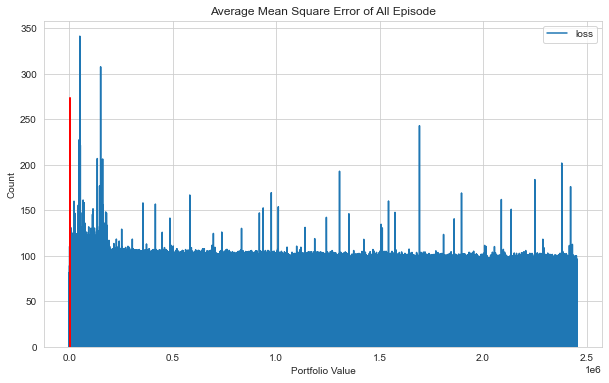

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

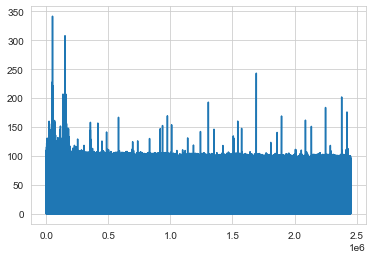

In [5]:
plt.plot(agent.model.losses)

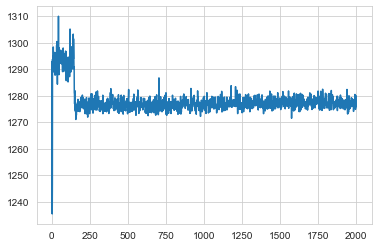

In [6]:
plt.plot(portfolio_value)

episode end value: 1146.19, duration: 0:00:00.204048
Sell: 403 times, Buy: 351 times


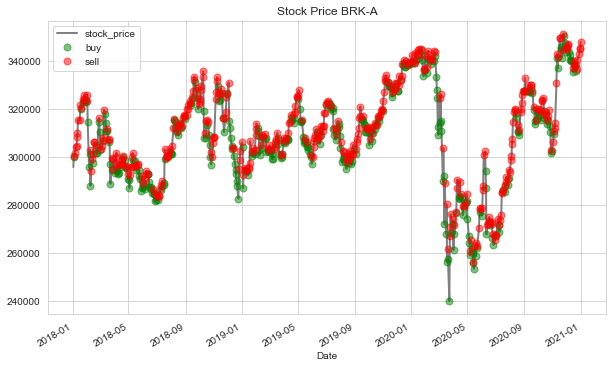

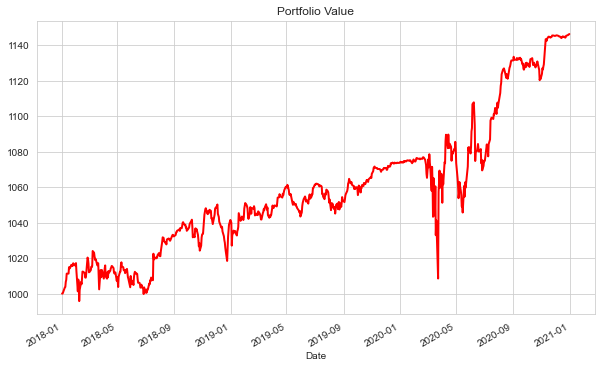

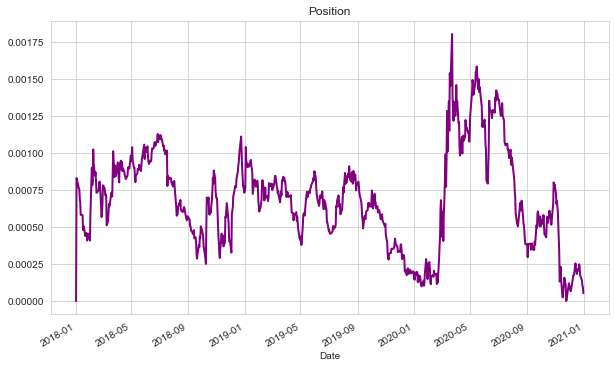

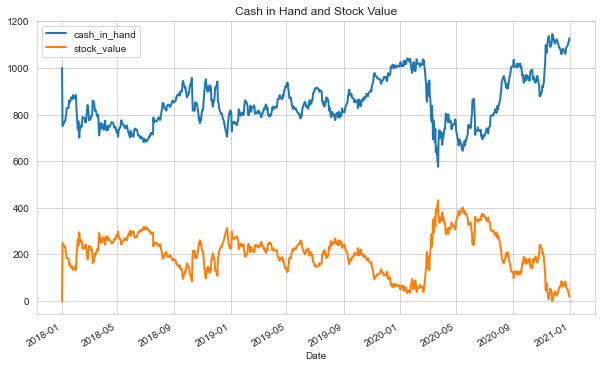

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BRK-A
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.65 %
Volatility: 0.0643
shape ratio: 0.5524
Maximun drawdown: -6.49 %
Calmar ratio: 0.7168
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 5.55 %
Volatility (benchmark): 0.2435
shape ratio: 0.1829
Maximun drawdown: -30.43 %
Calmar ratio (benchmark): 0.1825


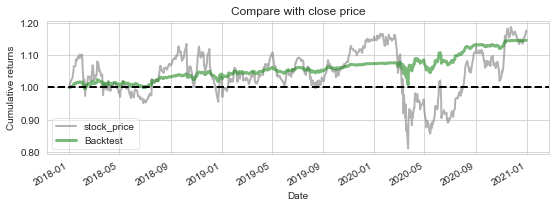

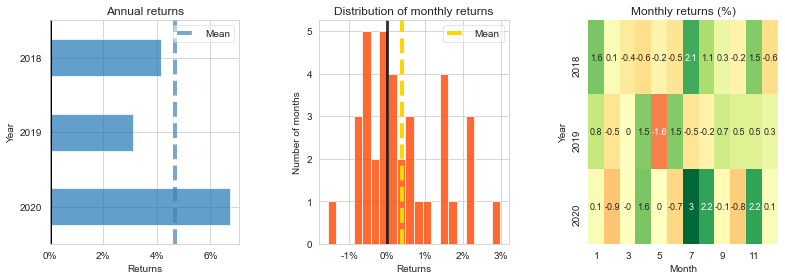

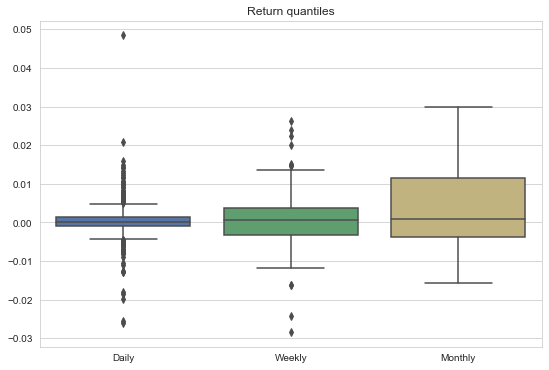

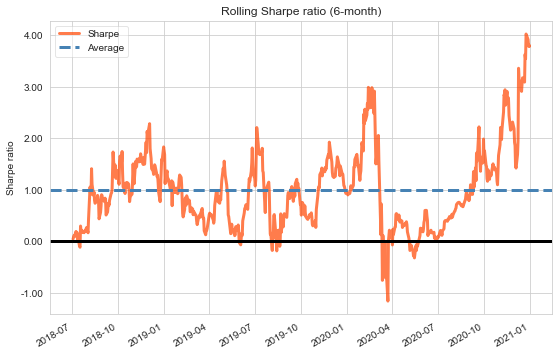

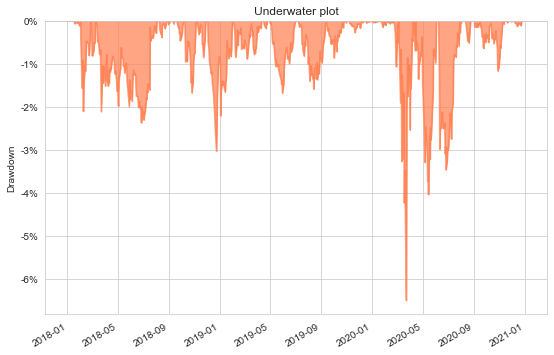

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')